<a href="https://colab.research.google.com/github/AyeshaIjazTabassum/PythonAIBootcamp/blob/main/Day12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


In [1]:
# 1. load dataset
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# 2. x and y
x = cancer.data
y = cancer.target

In [4]:
x.shape, y.shape

((569, 30), (569,))

In [5]:
# 3. split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [8]:
# 4. model
from sklearn import linear_model
model = linear_model.LogisticRegression(max_iter = 5000)

In [9]:
# 5. train
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [10]:
# 6. predict
y_pred = model.predict(x_test)

In [11]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1])

In [12]:
# 7. evaluate
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [13]:
print(f"Accuracy Score: {acc}")
print(f"Confusion Matrix: \n{cm}")

Accuracy Score: 0.9122807017543859
Confusion Matrix: 
[[32  5]
 [ 5 72]]


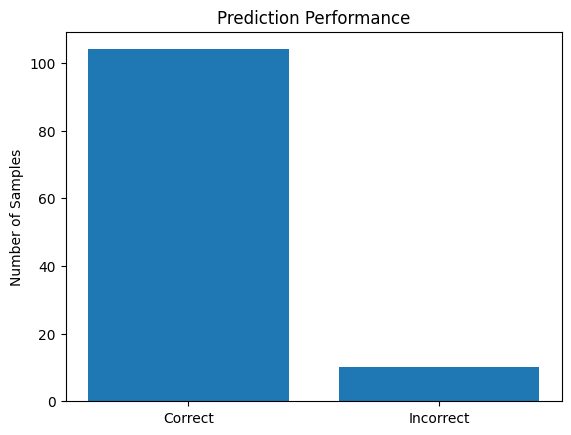

In [14]:
import numpy as np
import matplotlib.pyplot as plt

correct = np.sum(y_test == y_pred)
incorrect = np.sum(y_test != y_pred)

plt.bar(['Correct', 'Incorrect'], [correct, incorrect])
plt.ylabel("Number of Samples")
plt.title("Prediction Performance")
plt.show()


# **Self Practice on AdaBoost**

In [66]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [67]:
data = load_breast_cancer()
x = data.data
y = data.target

In [68]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
base_model = DecisionTreeClassifier(max_depth=2)

In [71]:
ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, learning_rate=1.0, random_state=42)

In [72]:
ada_model.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   random_state=42)

In [73]:
y_pred = ada_model.predict(x_test)

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.631578947368421

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.44      0.47        43
           1       0.69      0.75      0.72        71

    accuracy                           0.63       114
   macro avg       0.60      0.59      0.60       114
weighted avg       0.62      0.63      0.63       114

